In [63]:
!pip install keras
!pip install tensorflow

In [1]:
import numpy
import tensorflow
import pandas as pd

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)= mnist.load_data() 

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)

(60000, 28, 28)


In [5]:
print(x_test.shape)

(10000, 28, 28)


In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

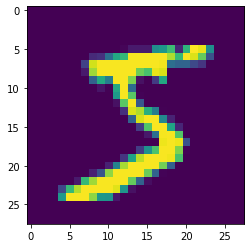

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [9]:
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

In [10]:
number_of_classes=10
y_train=np_utils.to_categorical(y_train,number_of_classes)
y_test=np_utils.to_categorical(y_test,number_of_classes)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
model=Sequential()

In [13]:
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(number_of_classes,activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 164s 88ms/step - loss: 0.2135 - accuracy: 0.9506 - val_loss: 0.0885 - val_accuracy: 0.9713
Epoch 2/5
1875/1875 [==============================] - 164s 87ms/step - loss: 0.0655 - accuracy: 0.9798 - val_loss: 0.0856 - val_accuracy: 0.9756
Epoch 3/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0470 - accuracy: 0.9850 - val_loss: 0.0896 - val_accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 164s 87ms/step - loss: 0.0360 - accuracy: 0.9886 - val_loss: 0.0949 - val_accuracy: 0.9760
Epoch 5/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0281 - accuracy: 0.9911 - val_loss: 0.1132 - val_accuracy: 0.9747


In [18]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print(metrics)

[0.11318095773458481, 0.9746999740600586]


In [19]:
prediction=model.predict(x_test[:4])
print(prediction)

[[2.1759294e-12 3.2142936e-20 2.3159568e-11 1.2256385e-09 2.2531875e-18
  7.4142943e-16 4.4943341e-18 1.0000000e+00 2.3190510e-11 4.1837788e-12]
 [3.6255280e-11 4.1265207e-07 9.9999964e-01 2.7224595e-10 2.0906956e-19
  2.3025327e-17 9.9514319e-10 6.0704370e-18 5.4379730e-12 1.2635783e-22]
 [2.9920561e-06 9.7891688e-01 5.0577003e-04 6.3249579e-12 1.9928369e-04
  8.6530960e-08 4.7594801e-07 1.9683144e-08 2.0374384e-02 7.8798870e-09]
 [1.0000000e+00 3.0991304e-17 1.1721190e-08 1.6477466e-15 1.9546495e-13
  6.3114553e-13 6.8805799e-12 5.2131317e-14 4.7182210e-11 1.3752364e-09]]


In [20]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [21]:
model.save('models/mnistCNN.h5')

In [34]:
!tar -zcvf project.tgz models/mnistCNN.h5

models/mnistCNN.h5


In [35]:
ls -1

models/
project.tgz


In [22]:
pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 16.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [23]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey":"pfFoivJ20KQjNAvP05VU1_qozTRGYss-tjRPJjGOoCBs"
}

client = APIClient(wml_credentials)

In [24]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [26]:
space_uid = guid_from_space_name(client, "models")
print("Space UID = " + space_uid)

Space UID = 7678848e-3815-494d-a918-f10bfa0c4a06


In [27]:
client.set.default_space(space_uid)

'SUCCESS'

In [28]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [29]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [36]:
model_details = client.repository.store_model(model='project.tgz',meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid}
                                             )

model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [37]:
model_id

'e81449ba-97cf-48c4-ae9a-74b086ad9721'

In [40]:
loss_and_acc=model.evaluate(x_test,y_test,verbose=2)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 - 4s - loss: 0.1132 - accuracy: 0.9747 - 4s/epoch - 12ms/step
Test Loss 0.11318095773458481
Test Accuracy 0.9746999740600586


Predicted Value:  7


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

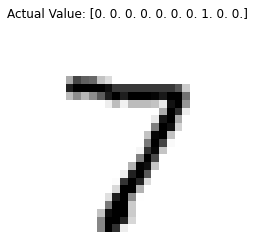

In [43]:
plt.imshow(x_test[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[0]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))
if(y_test[0]==(np.argmax(prediction[0]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')


Predicted Value:  2


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

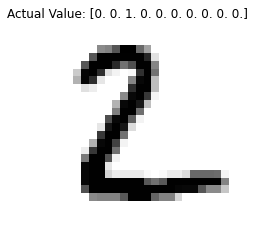

In [49]:
plt.imshow(x_test[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[1]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(y_test[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

In [65]:
model=tf.keras.models.load_model('models/mnistCNN.h5') 